# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Mee

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
import requests

article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article_page.text

import pickle
with open('q1_article.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)



2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [2]:
from bs4 import BeautifulSoup

parser = 'html.parser'

with open('q1_article.pkl', 'rb') as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, parser)

article_element = soup.find('article')

print(article_element.get_text())



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [10]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
from bs4 import BeautifulSoup
import pickle

parser = 'html.parser'
with open('q1_article.pkl', 'rb') as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, parser)

article_element = soup.find('article')

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())

#remove white space
non_ws_tokens = []
for token in doc:
    if not token.is_space:
        non_ws_tokens.append(token)

def we_care(token):
    return not (token.is_space or token.is_punct)

i_tokens = [token for token in doc if we_care(token) and token.text.lower() not in STOP_WORDS]

word_freq = Counter(map(str,i_tokens))
print('5 Most Frequent Tokens:', word_freq.most_common(5))

5 Most Frequent Tokens: [('laser', 29), ('headlights', 17), ('technology', 10), ('headlight', 10), ('LED', 10)]


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [11]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
from bs4 import BeautifulSoup
import pickle

parser = 'html.parser'
with open('q1_article.pkl', 'rb') as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, parser)

article_element = soup.find('article')

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())

#remove white space
non_ws_tokens = []
for token in doc:
    if not token.is_space:
        non_ws_tokens.append(token)

def we_care(token):
    return not (token.is_space or token.is_punct)

i_lemmas = [token.lemma_ for token in doc if we_care(token) and token.text.lower() not in STOP_WORDS]
lemma_freq = Counter(i_lemmas)
print('5 Most Frequent Lemmas:', lemma_freq.most_common(5))

5 Most Frequent Lemmas: [('laser', 35), ('headlight', 27), ('beam', 12), ('technology', 10), ('light', 10)]


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [56]:
def score_sentence_by_token(sentence, interesting_token):
    tokens = sentence.split()
    score = sum(1 for token in tokens if token.lower() in interesting_token) / len(tokens)
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc=nlp(sentence)
    lemmas =[token.lemma_.lower() for token in doc]
    score = sum(1 for lemma in lemmas if lemma in interesting_lemmas) / len(lemmas)

first_sentence = "While research lasers and laser pointers may primarily be used at typical room temperatures, automotive headlights must be able to withstand everything from 40 degrees below zero up to 50 degrees C."
interesting_token = ['laser', 'headlights', 'technology', 'headlight', 'LED']
token_score = score_sentence_by_token(first_sentence, interesting_token)

interesting_lemmas = ['laser', 'headlight', 'beam',' technology', 'light']
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

print('Token Score =', token_score)
print('Lemma Score =', lemma_score)

Token Score = 0.0625
Lemma Score = None


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

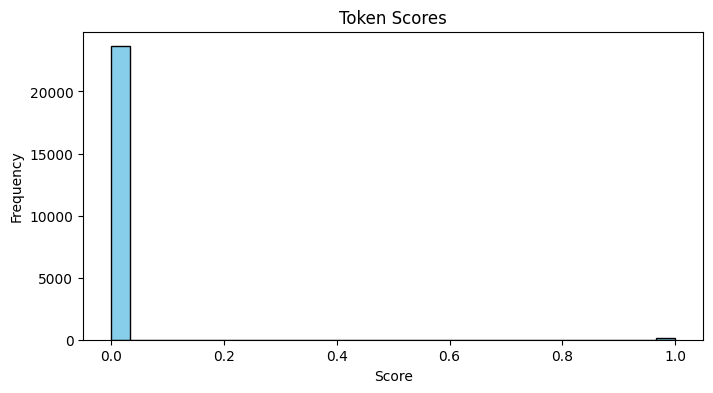

In [68]:
import matplotlib.pyplot as plt

sentences = article_html.split()
tokens_scores = [score_sentence_by_token(sentence, interesting_token) for sentence in sentences if sentence.strip()]

plt.figure(figsize=(8, 4))
plt.hist(tokens_scores, bins=30, color='skyblue', edgecolor='black')
plt.title('Token Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


I am sure my list is not correct.  I am not sure how to fix this.  However, if I must answer the question, I will say the most common range is 0.0 follow by 1.

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [ ]:
import matplotlib.pyplot as plt
import pickle



8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).